# Example: Population Trends (census 2010-2019)

The data below contains "Annual Estimates of the Resident Population by Single Year of Age and Sex for the United States."

In [ ]:
import pandas as pd

# Data URL
data_url = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

# Load data into a Pandas DataFrame
full_census_df = pd.read_csv(data_url)

# Display the first 10 rows of the DataFrame
full_census_df.head(10)

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
1,0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
2,0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
3,0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
4,0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
5,0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
6,0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
7,0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
8,0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
9,0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


### Table Description

A [description of the table](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf) appears online. 

The `SEX` column contains numeric codes:
- `0` stands for the total
- `1` for male
- `2` for female

The `AGE` column contains ages in completed years
- the special value `999` is a sum of the total population
- the value `100` is actually `100+`

### Filtering

Suppose we are only interested in the population changes from 2014 to 2019. Let's `select` the relevant columns.

In [ ]:
# Select relevant columns for the years 2014 and 2019
partial_census_df = full_census_df[['SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019']]
partial_census_df

,SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
...,...,...,...,...
301,2,97,62407,84358
302,2,98,45887,62607
303,2,99,32245,42528
304,2,100,57108,76850


We can simplify the labels of the selected columns.

In [ ]:
# Rename columns for clarity
us_pop = partial_census_df.rename(columns={'POPESTIMATE2014': '2014', 'POPESTIMATE2019': '2019'})
us_pop

,SEX,AGE,2014,2019
0,0,0,3954787,3783052
1,0,1,3948891,3829599
2,0,2,3958711,3922044
3,0,3,4005928,3998665
4,0,4,4004032,4043323
...,...,...,...,...
301,2,97,62407,84358
302,2,98,45887,62607
303,2,99,32245,42528
304,2,100,57108,76850


## Ages 97-100

As a warm-up, let's examine the total population, labeled by `SEX` code 0. Since all these rows will have the same value 0 in the `SEX` column, we will drop that column.

In [ ]:
# Filter for total population (SEX code 0) and drop the SEX column
us_pop_by_age = us_pop[us_pop['SEX'] == 0].drop(columns='SEX')
us_pop_by_age

,AGE,2014,2019
0,0,3954787,3783052
1,1,3948891,3829599
2,2,3958711,3922044
3,3,4005928,3998665
4,4,4004032,4043323
...,...,...,...
97,97,82948,116969
98,98,59546,86150
99,99,41277,57124
100,100,70685,100322


Now let's look at the population in the highest ages.

In [ ]:
# Display population for ages 97-100
us_pop_by_age[(us_pop_by_age['AGE'] >= 97) & (us_pop_by_age['AGE'] <= 100)]

,AGE,2014,2019
97,97,82948,116969
98,98,59546,86150
99,99,41277,57124
100,100,70685,100322


In [ ]:
# Calculate change in population from 2014 to 2019
change = us_pop_by_age['2019'] - us_pop_by_age['2014']

# Add columns for absolute change and percent change
us_pop_change = us_pop_by_age.assign(
    Change=change,
    Percent_Change=change / us_pop_by_age['2014']
)

# Format percent change column
us_pop_change['Percent_Change'] = us_pop_change['Percent_Change'].map(lambda x: f"{x:.2%}")
us_pop_change

,AGE,2014,2019,Change,Percent_Change
0,0,3954787,3783052,-171735,-4.34%
1,1,3948891,3829599,-119292,-3.02%
2,2,3958711,3922044,-36667,-0.93%
3,3,4005928,3998665,-7263,-0.18%
4,4,4004032,4043323,39291,0.98%
...,...,...,...,...,...
97,97,82948,116969,34021,41.01%
98,98,59546,86150,26604,44.68%
99,99,41277,57124,15847,38.39%
100,100,70685,100322,29637,41.93%


Almost all the entries displayed in the `Percent Change` column are negative, demonstrating a drop in population at the youngest ages. However, the overall population (`AGE=999`) grew by about 9.9 million people, a percent change of just over 3%.

In [ ]:
# Display population change for age 999 (total population)
us_pop_change[us_pop_change['AGE'] == 999]

,AGE,2014,2019,Change,Percent_Change
101,999,318301008,328239523,9938515,3.12%


Let us compare this to the change at each age. For ease of interpretation, we will sort the table in decreasing order of the absolute change in population, contained in the column `Change`.

In [ ]:
# Display top changes by age group sorted by absolute change
us_pop_change[us_pop_change['AGE'] != 999].sort_values(by='Change', ascending=False).head()

,AGE,2014,2019,Change,Percent_Change
72,72,2191642,3191048,999406,45.60%
68,68,2567511,3345475,777964,30.30%
69,69,2530460,3252423,721963,28.53%
70,70,2461426,3136704,675278,27.43%
71,71,2516392,3083083,566691,22.52%


Take a look at the top few rows. While the percent change is about 3% for the overall population, it jumps to well over 20% for the people in their late sixties and early seventies. This stunning change contributes to what is known as the **greying of America**.

What could explain this large increase? We can explore this question by examining the years in which the relevant groups were born.

Those who were in the age group 69 to 72 in 2014 were born in the years 1942 to 1945. The attack on Pearl Harbor was in late 1941, and by 1942 U.S. forces were heavily engaged in a massive war that ended in 1945.

Those who were 69 to 72 years old in 2019 were born in the years 1947 to 1950, at the height of the post-WWII baby boom in the United States.

**The post-war jump in births is a major reason for the large changes that we have observed**.

# Example: Sex Ratios

This time we will focus on population trends in relation to the SEX column.

In [ ]:
# Filter for 2019 data and remove unnecessary columns
us_pop_2019 = us_pop.drop(columns=['2014'])

# Select rows where age is 999 (total population)
all_ages = us_pop_2019[us_pop_2019['AGE'] == 999].drop(columns='AGE')
all_ages

,SEX,2019
101,0,328239523
203,1,161657324
305,2,166582199


Calculate proportions relative to total population in 2019:

In [ ]:
pop_2019 = all_ages.iloc[0]['2019']
all_ages['Proportion'] = (all_ages['2019'] / pop_2019).map(lambda x: f"{x:.2%}")
all_ages

,SEX,2019,Proportion
101,0,328239523,100.00%
203,1,161657324,49.25%
305,2,166582199,50.75%


### Proportions Among Infants

When we look at infants, however, the opposite is true. Let’s define infants to be babies who have not yet completed one year, represented in the rows corresponding to `AGE 0`. Here are their numbers in the population. You can see that male infants outnumbered female infants.

In [ ]:
infants = us_pop_2019[us_pop_2019['AGE'] == 0].drop(columns='AGE')
infants_2019 = infants.loc[0, '2019']
infants['Proportion'] = (infants['2019'] / infants_2019).map(lambda x: f"{x:.2%}")
infants

,SEX,2019,Proportion
0,0,3783052,100.00%
102,1,1935117,51.15%
204,2,1847935,48.85%


As before, we can convert these counts to percents out of the total numbers of infants. The resulting table shows that in 2019, just over 51% of infants in the U.S. were male. 

In fact, it has long been observed that the proportion of males among newborns is slightly more than 1/2. The reason for this is not thoroughly understood.

### Sex Ratio at Each Age

While there are more male infants than female, there are more females than males in the population overall.

In [ ]:
# Select rows for males and females (excluding total)
females = us_pop_2019[(us_pop_2019['SEX'] == 2) & (us_pop_2019['AGE'] != 999)].reset_index(drop=True)
males = us_pop_2019[(us_pop_2019['SEX'] == 1) & (us_pop_2019['AGE'] != 999)].reset_index(drop=True)
females

,SEX,AGE,2019
0,2,0,1847935
1,2,1,1871014
2,2,2,1916500
3,2,3,1955655
4,2,4,1976372
...,...,...,...
96,2,96,111417
97,2,97,84358
98,2,98,62607
99,2,99,42528


In [ ]:
# Calculate sex ratios for 2019
ratios = females[['AGE', '2019']]
ratios['2019 F:M RATIO'] = ratios['2019'] / males['2019']
ratios

,AGE,2019,2019 F:M RATIO
0,0,1847935,0.954947
1,1,1871014,0.955289
2,2,1916500,0.955601
3,3,1955655,0.957242
4,4,1976372,0.956177
...,...,...,...
96,96,111417,2.419689
97,97,84358,2.586796
98,98,62607,2.659262
99,99,42528,2.913675


In [ ]:
# Display sex ratios for ages above 75
ratios_above_75 = ratios[ratios['AGE'] > 75]
ratios_above_75

,AGE,2019,2019 F:M RATIO
76,76,1218702,1.214222
77,77,1056331,1.235576
78,78,960647,1.263727
79,79,898590,1.281286
80,80,831640,1.292093
81,81,788013,1.327453
82,82,715575,1.361014
83,83,671025,1.397488
84,84,631230,1.446027
85,85,551385,1.485885


Finally, let's plot the ratio

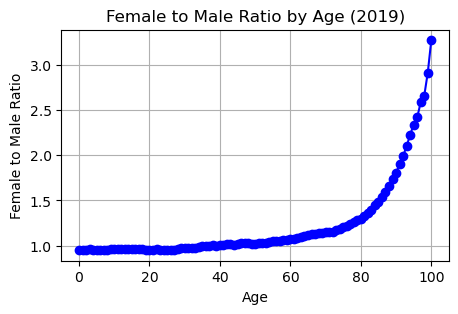

In [ ]:
import matplotlib.pyplot as plt

# Plot sex ratios against age
plt.figure(figsize=(5, 3))
plt.plot(ratios['AGE'], ratios['2019 F:M RATIO'], marker='o', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Female to Male Ratio')
plt.title('Female to Male Ratio by Age (2019)')
plt.grid(True)
plt.show()
